#### 第1価格秘密入札のシミュレーション
##### 第1価格秘密入札のプロトコル
- 主催者が開始時点での最低の価格を参加者全員に通知する。
- 各参加者は主催者に自身の価格を申告する。この価格はほかの参加者には知らされない。
- 最高の価格（第1価格）を申告した参加者が財を取得し，自身の申告額を支払う。

##### シミュレーション上の設定
- 各参加者の真の評価額$v_i$についてIPV設定を採用する。  
  $ v_i $ は独立に区間 $ [v_{\min}, v_{\max}] $ 上の一様分布に従う

- 参加者の申告額（入札額）$\hat{v}_i$は，評価額$v_i$と同様に連続型の変数であり，
  $ \hat{v}_i \in [v_{\min}, v_{\max}] $。

- 戦略は，以下のいずれかとする。
  - 第1価格秘密入札におけるナッシュ均衡戦略:  &emsp; $ \hat{v}_i = \dfrac{n-1}{n} v_i $
  - 正直な申告:  &emsp; $ \hat{v}_i = v_i $
  - 混合戦略: &emsp; 区間 $[v_{\min}, v_i]$ 上の一様分布に従う $\hat{v}_i$ の標本値を申告額とする。

sample exp. util.: [0.12940062 0.36406649 0.37496706 0.37580655 0.37117112]


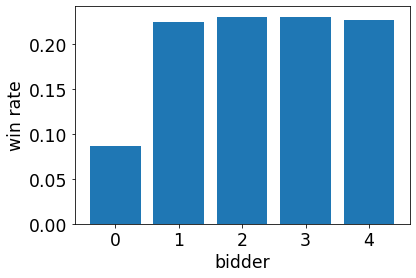

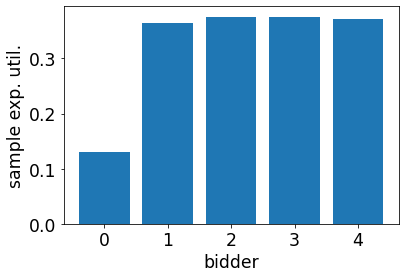

In [36]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

num_bidders = 5; num_repeat = 10000 #3 #
vmin, vmax = (0, 10)

v = uniform.rvs(loc=vmin, scale=(vmax - vmin), size=(num_repeat, num_bidders))

st_nash_eql = lambda v, n: (n-1)*v/n
st_truthful = lambda v, n: v
st_rand_uni = lambda v, n: uniform.rvs(loc=vmin, scale=(v - vmin), size=v.shape)
stg_name = {
    st_nash_eql: 'strategy in Nash Eql. (of 1st-price auction)', 
    st_truthful: 'truthful strategy',
    st_rand_uni: 'mixed strategy (uniform dist. over [vmin, v])'}


if False:
    # 全員が同じ戦略をとる場合

    strategy_list = [st_nash_eql for dummy in range(num_bidders)]
    # strategy_list = [st_truthful for dummy in range(num_bidders)]

else:
    # 一人だけ異なる戦略をとる場合

    # strategy_list = [st_truthful, *(st_nash_eql for dummy in range(num_bidders-1))]
    # strategy_list = [st_truthful, *(st_nash_eql for dummy in range(num_bidders-1))]
    # strategy_list = [st_nash_eql, *(st_truthful for dummy in range(num_bidders-1))]
    strategy_list = [st_rand_uni, *(st_nash_eql for dummy in range(num_bidders-1))]
    # strategy_list = [st_rand_uni, *(st_truthful for dummy in range(num_bidders-1))]

v_hat = np.vstack([strategy_list[i](v[:, i], num_bidders) for i in range(num_bidders)]).T

sort_axis = 1
idx = np.argsort(v_hat, axis=sort_axis)
idx_winner = np.expand_dims(idx[:,-1], axis=-1)
payment = np.take_along_axis(v_hat, idx_winner, axis=sort_axis)
true_value = np.take_along_axis(v, idx_winner, axis=sort_axis)
win_count = np.array([np.count_nonzero(idx_winner == i) for i in range(num_bidders)])
win_rate = win_count/num_repeat
util = np.zeros_like(v_hat)
np.put_along_axis(util, idx_winner, true_value - payment, axis=sort_axis) 
smp_exp_util = np.mean(util, axis=0)
print('sample exp. util.:', smp_exp_util)

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['ytick.labelsize'] = 'xx-large' #'large'
plt.rcParams['xtick.labelsize'] = 'xx-large' #'large'
plt.rcParams['axes.labelsize']  = 'xx-large' #'large'

plt.figure()
plt.bar(np.arange(num_bidders), win_rate)
plt.xlabel('bidder')
plt.ylabel('win rate')
plt.savefig('win_rate_1st-pr_auction.pdf', bbox_inches='tight')

plt.figure()
plt.bar(np.arange(num_bidders), smp_exp_util)
plt.xlabel('bidder')
plt.ylabel('sample exp. util.')
plt.savefig('smp_exp_util_1st-pr_auction.pdf', bbox_inches='tight')


#### 解説
- 以下の解説のセルを正常に実行するには Notebook の最初から順にセルを実行しておく必要がある。

一様分布に従う確率変数の標本値は
```Python
    v = uniform.rvs(loc=vmin, scale=(vmax - vmin), size=(num_repeat, num_bidders))
```
で作られる。ここで，配列 `v` について，以下のことが成立する。
- `v.shape == (num_repeat, num_bidders)`
- 各要素は区間 $ [v_{\min}, v_{\max}] $ 上の一様分布 $p(v) = 1$ に独立に従う

In [37]:
v = uniform.rvs(loc=vmin, scale=(vmax - vmin), size=(num_repeat, num_bidders))
print(v.shape)

(10000, 5)


戦略は真の評価額 $v$ の関数であり，
```Python
    strategy_list = [st_rand_uni, *(st_nash_eql for dummy in range(num_bidders-1))]
```
は関数の参照の list となる。`*(genexp)` はジェネレータ式 `genexp` で生成した要素を展開([unpack](https://docs.python.org/ja/3/reference/expressions.html#expression-lists))する。

In [38]:
def f(x):
    return x + 1000

def g(x):
    return x + 2000

l = [*(1234 for dummy in range(2)), *(5678 for dummy in range(3))]
print(l)

f_list = [*(f for dummy in range(2)), *(g for dummy in range(3))]
print(f_list[0](1))
print(f_list[1](2))
print(f_list[2](3))
print(f_list[3](4))
print(f_list[4](5))


[1234, 1234, 5678, 5678, 5678]
1001
1002
2003
2004
2005


[`numpy.vstack([arr0, arr1, ...])`](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html?highlight=vstack) 
は `arr0`, `arr1`, `...` を並べた配列を作る。

In [39]:
arr0 = np.array([1, 2, 3, 4])
arr1 = np.array([5, 6, 7, 8])
arr_stacked = np.vstack([arr0, arr1])
print(repr(arr_stacked))

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])


[`arr.T`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html) 
は `arr` を転置した配列を作る

In [40]:
arr = np.array([[11, 22, 33],
                [44, 55, 66]])
print(repr(arr.T))

array([[11, 44],
       [22, 55],
       [33, 66]])


2次元配列 `arr` について，
```Python
    idx = np.argsort(arr, axis=1)
``` 
の結果として，
```Python
    sorted_arr = np.take_along_axis(arr, idx, axis=1)
``` 
は，各行の要素を昇順に並べなおした配列を作る。

In [41]:
arr = np.array([[10, 4, 3],
                [2, 10, 0]])
idx = np.argsort(arr)
print(repr(idx))
sorted_arr = np.take_along_axis(arr, idx, axis=1) 
print(repr(sorted_arr))


array([[2, 1, 0],
       [2, 0, 1]], dtype=int64)
array([[ 3,  4, 10],
       [ 0,  2, 10]])


2次元配列 `arr` について，
```Python
    idx = np.argsort(arr, axis=1)
``` 
の結果として，
```Python
    idx_winner = np.expand_dims(idx[:,-1], axis=-1)
    sorted_arr = np.take_along_axis(arr, idx_winner, axis=1)
``` 
は，各行の最大値の要素のみを取り出した配列を作る。

In [42]:
arr = np.array([[10, 4, 3],
                [1, 10, 0]])
idx = np.argsort(arr)
idx_winner = np.expand_dims(idx[:,-1], axis=-1)
print(repr(idx))
print(repr(idx_winner))
arr_winner = np.take_along_axis(arr, idx_winner, axis=1)
print(repr(arr_winner))


array([[2, 1, 0],
       [2, 0, 1]], dtype=int64)
array([[0],
       [1]], dtype=int64)
array([[10],
       [10]])


[`numpy.put_along_axis(arr_replaced, idx, vals, axis)`](https://numpy.org/doc/stable/reference/generated/numpy.put_along_axis.html) は   
[`numpy.take_along_axis(arr, idx, axis)`](https://numpy.org/doc/stable/reference/generated/numpy.take_along_axis.html)
と逆に，`idx` で指定された要素を対応する `vals` の要素で置き換える。

In [43]:
arr = np.array([[10, 4, 3],
                [1, 10, 0]])
idx = np.argsort(arr)
idx_winner = np.expand_dims(idx[:,-1], axis=-1)
arr_winner = np.take_along_axis(arr, idx_winner, axis=1)
fill_vals = np.full_like(arr_winner, 999)
print(fill_vals)
arr_replaced = arr.copy()
np.put_along_axis(arr_replaced, idx_winner, fill_vals, axis=1)
print(repr(arr_replaced))

[[999]
 [999]]
array([[999,   4,   3],
       [  1, 999,   0]])
